In [1]:
# for fast array manipulation
import numpy as np
# for plotting
import matplotlib.pyplot as plt
# for numerical ODE integration
from scipy.integrate import odeint
# for nonlinear equations
from scipy.optimize import fsolve
from matplotlib.pyplot import cm
# needed to calculate (complex) squareroots of negative numbers
from scipy import sqrt
# to display plots in-line
%matplotlib inline
#for interactive mode
%matplotlib notebook
#import sympy for fixed points?
import sympy as sm

#slider
from matplotlib.widgets import Slider, Button, RadioButtons







In [2]:
# minimum and maximum E and I values we want displayed in the graph-sayshttp://martinosorb.github.io#variables
tau=0.01
w_ee=15
w_ei=-15
w_ie=10
w_ii=-5
e=1

#define tanh np.maximum

def wow(x):
    y=np.maximum(0,x)
    return np.tanh(y)


#Wilson-Cowan ODE
def amidoingright(what,t):
    E=what[0]
    I=what[1]
    d_E = (-E+wow(w_ee*E+w_ei*I+e))/tau
    d_I=(-I+wow(w_ie*E+w_ii*I))/tau
    return [d_E, d_I]

# minimum and maximum E and I values we want displayed in the graph-says http://martinosorb.github.io
minval = -1
maxval = 1
resolution = 30
# State variables
x1 = np.linspace(minval, maxval, resolution)
x2 = np.linspace(minval, maxval, resolution)
# Create a grid for evaluation of the vector field
x1, x2 = np.meshgrid(x1, x2)
# Evaluate the slopes
X1, X2 = amidoingright([x1, x2],0)
# Compute the magnitude vector
M = np.hypot(X1, X2)
# Normalize the slopes vectors (for the field plot)
X1, X2 = X1/M, X2/M


# simulation duration and step size
time = np.linspace(0, 5,100)

# starting point, hopefully inside the basin of attraction of our attractor
E0, I0 = 0,0 #try changing this

# find the solution with scint.odeint
odesol = odeint(amidoingright, [E0, I0], time)
# separate the two solutions
exc_t, inh_t = odesol.T




In [3]:
#check nullcline
#try nullclining
enc=np.arange(-1,1,0.01)
inc=np.arange(-1,1,0.01)
En,In=np.meshgrid(enc,inc)
#levels = [0]


Zn1=(-En+wow(w_ee*En+w_ei*In+e))/tau
Zn2=(-In+wow(w_ie*En+w_ii*In))/tau


<IPython.core.display.Javascript object>


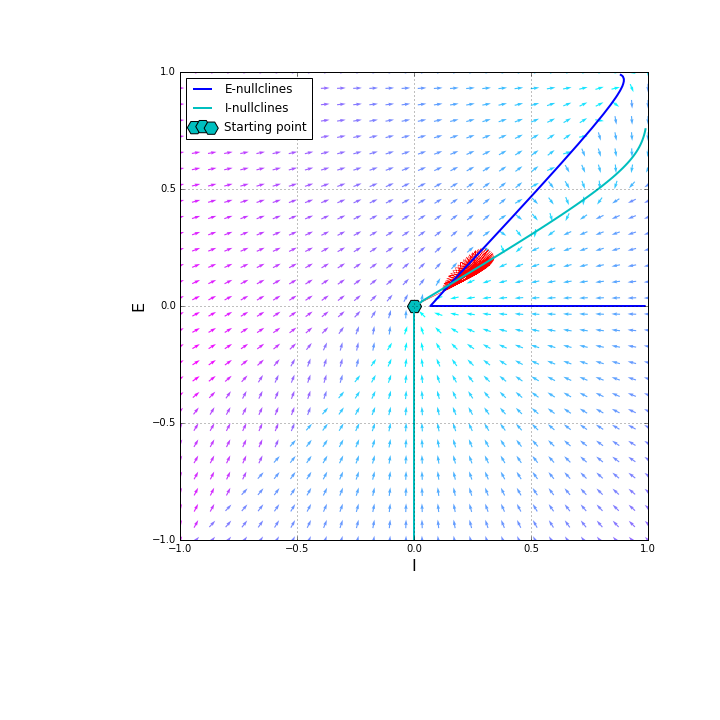

<IPython.core.display.Javascript object>


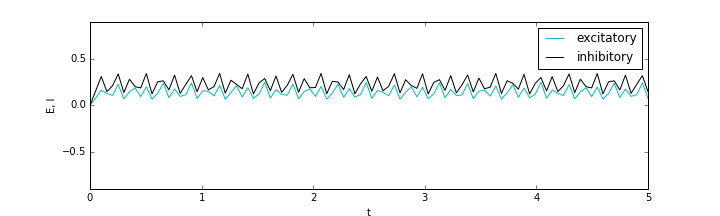

In [6]:
#plot
# plotting the vector field in the state space (E, I)

fig=plt.figure(figsize=(10, 10))
test=fig.add_subplot(111)
fig.subplots_adjust(left=0.25, bottom=0.25)
plt.quiver(x2, x1, X2, X1, M,pivot='mid', headlength = 5, cmap=cm.cool)
plt.xlim(minval,maxval)
plt.ylim(minval,maxval)
#nullcline
levels=[0]
Enull=plt.contour(In,En,Zn1,levels,colors=('b'),linewidths=2)
Inull=plt.contour(In,En,Zn2,levels,colors=('c'),linewidths=2)

plt.xlabel('I', fontsize=16) # yes, you can use Latex code!
plt.ylabel('E', fontsize=16)
plt.grid()



# plot the starting point & fixed point
I_f=0
E_f=0
sp=plt.scatter(I0, E0, marker='H', c='c', s=200, label="Starting point", edgecolor="k")
#fp=plt.scatter(I_f, E_f, marker='p', c='m', s=200, label="Fixed point", edgecolor="k")
lines=[Enull.collections[0],Inull.collections[0],sp]
labels=['E-nullclines','I-nullclines','Starting point']
plt.legend(lines,labels,loc="upper left")
# plot the solution in the state space
plt.plot(inh_t, exc_t, 'r-',zorder=1, alpha=1,linewidth=0.5);




#plot the solution in time
plt.figure(figsize=(10,3))
plt.ylabel('E, I')
plt.xlabel('t')
plt.plot(time, exc_t, 'c-', label="excitatory");
plt.plot(time, inh_t, 'k-', label="inhibitory");
plt.ylim([-0.9,0.9])
plt.legend();


In [5]:
?float()